Astronomy 19
Tidal Report - Group 5A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Read data from file

f = open('ASTR19_S22_group_project_data.txt', "r") # Open file to be read
f.readline() # Read past the first three lines bc they contain comments
f.readline()
f.readline()

arr_day=[]
arr_time=[]
arr_tide=[]
for i in f:
    split_up=i.split()
    arr_day.append(int(split_up[0]))
    arr_time.append(split_up[1])
    arr_tide.append(float(split_up[2]))

arr_mins = []
for s in range(len(arr_time)):
    hr_min = arr_time[s].split(":")
    arr_mins.append(((int(hr_min[0]) / 24) + int(hr_min[1]) / (60*24)) + arr_day[s])
arr_mins = np.array(arr_mins)
arr_tide = np.array(arr_tide)
# print("days = " + str(arr_day))
# print("\ntime = " + str(arr_mins))
# print("\ntide = " + str(arr_tide))

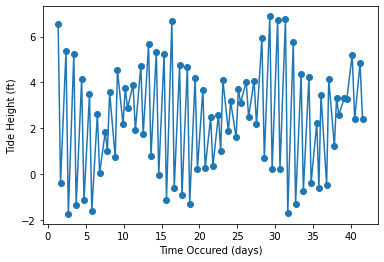

In [3]:
# 1. Define an oscillatory function.
plt.plot(arr_mins, arr_tide, 'o-')
plt.xlabel("Time Occured (days)")
plt.ylabel("Tide Height (ft)")
plt.show()

[-1.03598774  0.43196597  0.86207206  2.53967686]


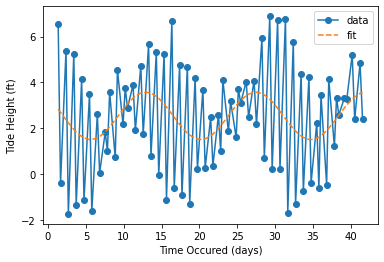

In [47]:
# 2. Fit the function to the data.

from scipy import optimize
import math

# arr_mins contains the independent variable (x-values)
# arr_tide contains the dependent variable (y-values)

def objective(x, a, b, c, d): # time is type int
    return (a * np.sin(b*x - c) + d)

guess = [7, .5, 2, 3]
popt, pcov = optimize.curve_fit(objective, arr_mins, arr_tide, p0=guess) #fit
a, b, c, d = popt # split param values
print(popt)
#print('y = %.5f * sin(%.5f * x)' % (a, b, c, d)) 

y_line = objective(arr_mins, a, b, c, d)  # calculate output made by best fit

# create a line plot for the mapping function
plt.plot(arr_mins, arr_tide, 'o-', label='data')
plt.plot(arr_mins, y_line, '--', label='fit')
plt.legend()
plt.xlabel("Time Occured (days)")
plt.ylabel("Tide Height (ft)")
plt.show()

In [34]:
# 3. Subtract off the best fit.

In [35]:
# 4. Deviation caused by tsunami.
...